In [1]:
import pandas as pd

In [2]:
covid = pd.read_csv(r"C:\Users\abula\Downloads\covid_19_data.csv\covid_19_data.csv")
covid.head()

,SNo,ObservationDate,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,1,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,2,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0
2,3,01/22/2020,Chongqing,Mainland China,1/22/2020 17:00,6.0,0.0,0.0
3,4,01/22/2020,Fujian,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
4,5,01/22/2020,Gansu,Mainland China,1/22/2020 17:00,0.0,0.0,0.0


In [3]:
covid.isna().sum()

SNo                    0
ObservationDate        0
Province/State     78103
Country/Region         0
Last Update            0
Confirmed              0
Deaths                 0
Recovered              0
dtype: int64

In [4]:
# Changing the observation data column to date.
covid.columns= covid.columns.str.replace('ObservationDate', 'Date')

In [5]:
covid = covid.iloc[:, 1:]

In [6]:
covid.head(2)

,Date,Province/State,Country/Region,Last Update,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1/22/2020 17:00,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,1/22/2020 17:00,14.0,0.0,0.0


In [7]:
# Removing last update column
covid = covid.drop('Last Update', axis=1)

In [8]:
covid.head(2)

,Date,Province/State,Country/Region,Confirmed,Deaths,Recovered
0,01/22/2020,Anhui,Mainland China,1.0,0.0,0.0
1,01/22/2020,Beijing,Mainland China,14.0,0.0,0.0


In [9]:
covid.Date.dtype

dtype('O')

In [10]:
# Converting the date to datetime series
covid['Date'] = pd.to_datetime(covid['Date'])

In [11]:
covid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306429 entries, 0 to 306428
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Date            306429 non-null  datetime64[ns]
 1   Province/State  228326 non-null  object        
 2   Country/Region  306429 non-null  object        
 3   Confirmed       306429 non-null  float64       
 4   Deaths          306429 non-null  float64       
 5   Recovered       306429 non-null  float64       
dtypes: datetime64[ns](1), float64(3), object(2)
memory usage: 14.0+ MB


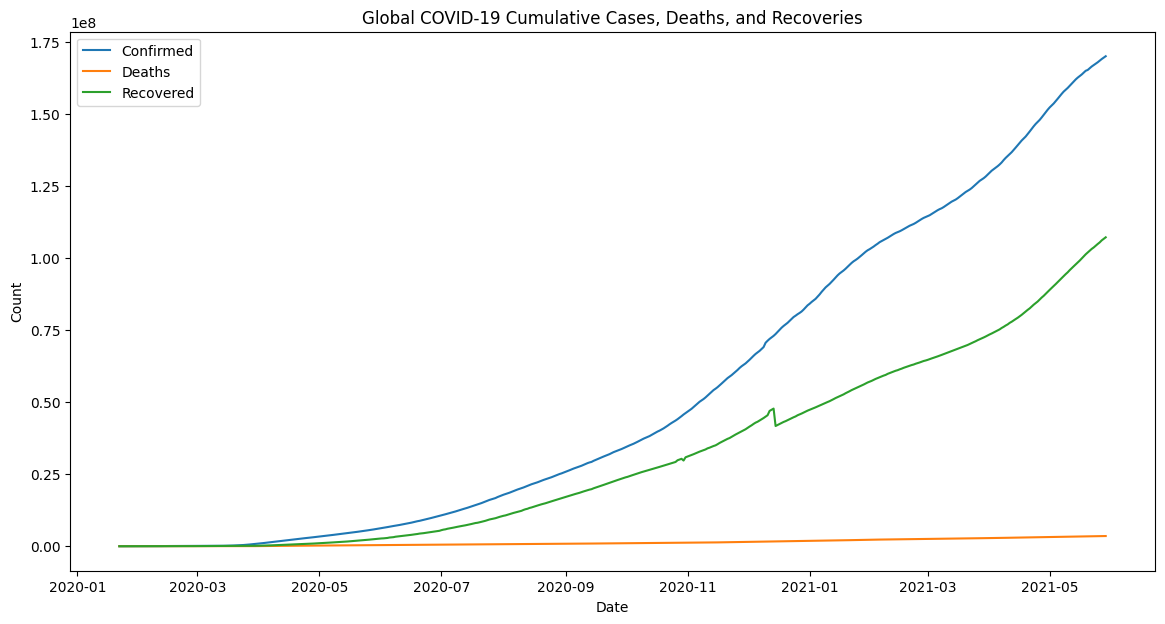

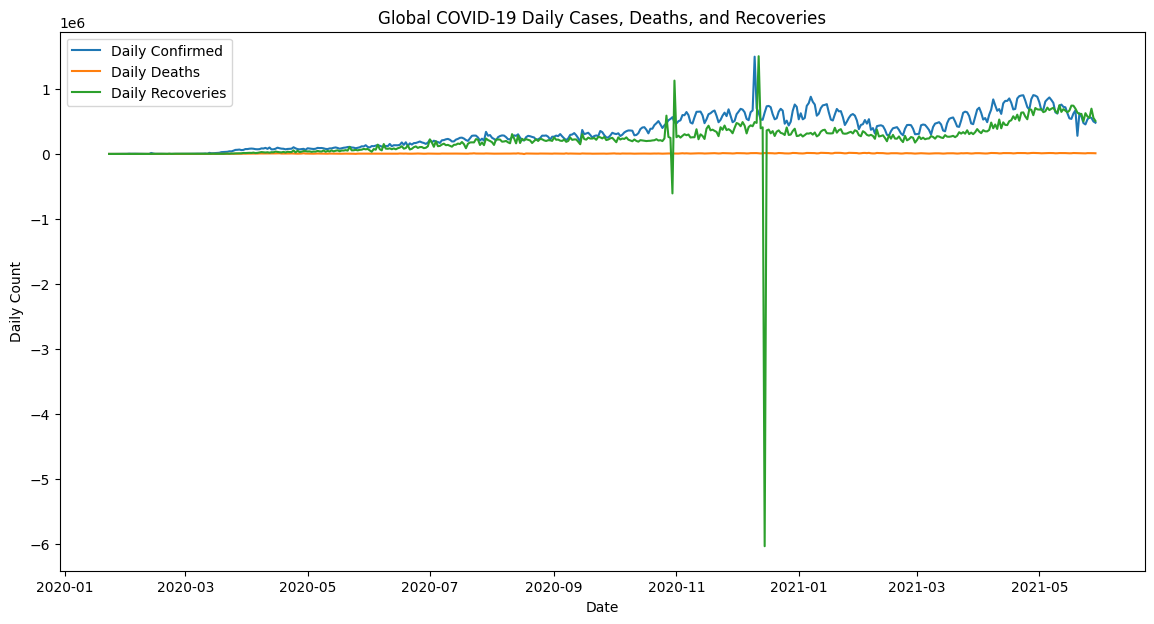

In [12]:
import matplotlib.pyplot as plt

# Aggregate by date for global trends
global_trends = covid.groupby('Date').sum()

# Calculate daily changes
global_trends['Daily Confirmed'] = global_trends['Confirmed'].diff()
global_trends['Daily Deaths'] = global_trends['Deaths'].diff()
global_trends['Daily Recoveries'] = global_trends['Recovered'].diff()

# Plot cumulative trends
plt.figure(figsize=(14, 7))
plt.plot(global_trends.index, global_trends['Confirmed'], label='Confirmed')
plt.plot(global_trends.index, global_trends['Deaths'], label='Deaths')
plt.plot(global_trends.index, global_trends['Recovered'], label='Recovered')
plt.legend()
plt.title("Global COVID-19 Cumulative Cases, Deaths, and Recoveries")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

# Plot daily changes
plt.figure(figsize=(14, 7))
plt.plot(global_trends.index, global_trends['Daily Confirmed'], label='Daily Confirmed')
plt.plot(global_trends.index, global_trends['Daily Deaths'], label='Daily Deaths')
plt.plot(global_trends.index, global_trends['Daily Recoveries'], label='Daily Recoveries')
plt.legend()
plt.title("Global COVID-19 Daily Cases, Deaths, and Recoveries")
plt.xlabel("Date")
plt.ylabel("Daily Count")
plt.show()


In [13]:
# Looking at the nigerian data
naijacovid = covid[covid['Country/Region'] == 'Nigeria']

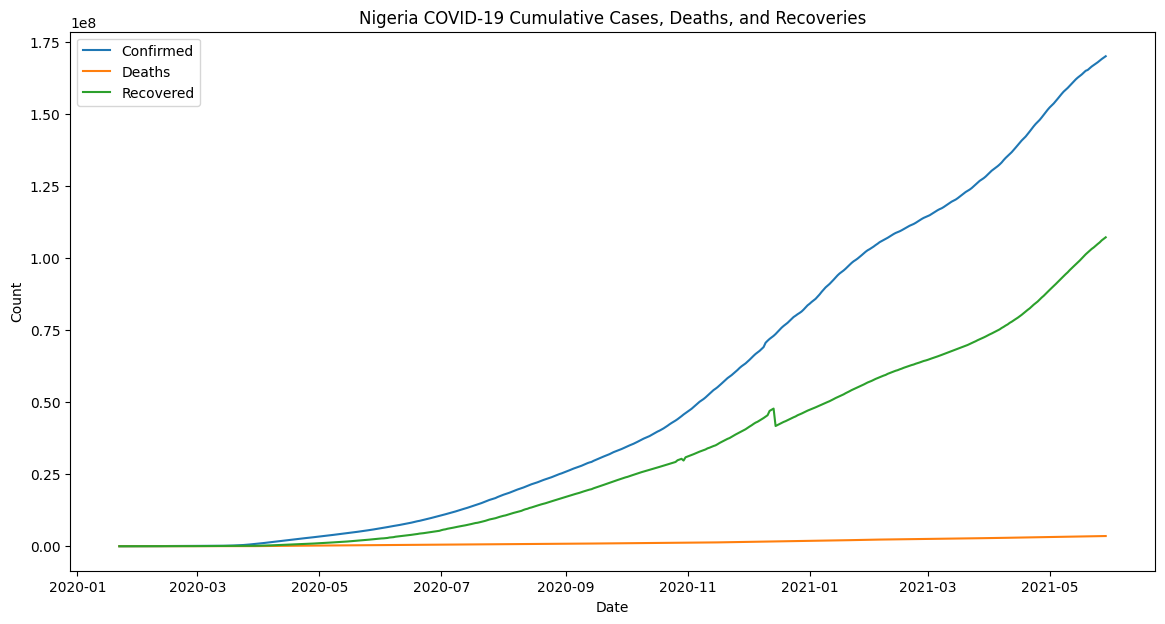

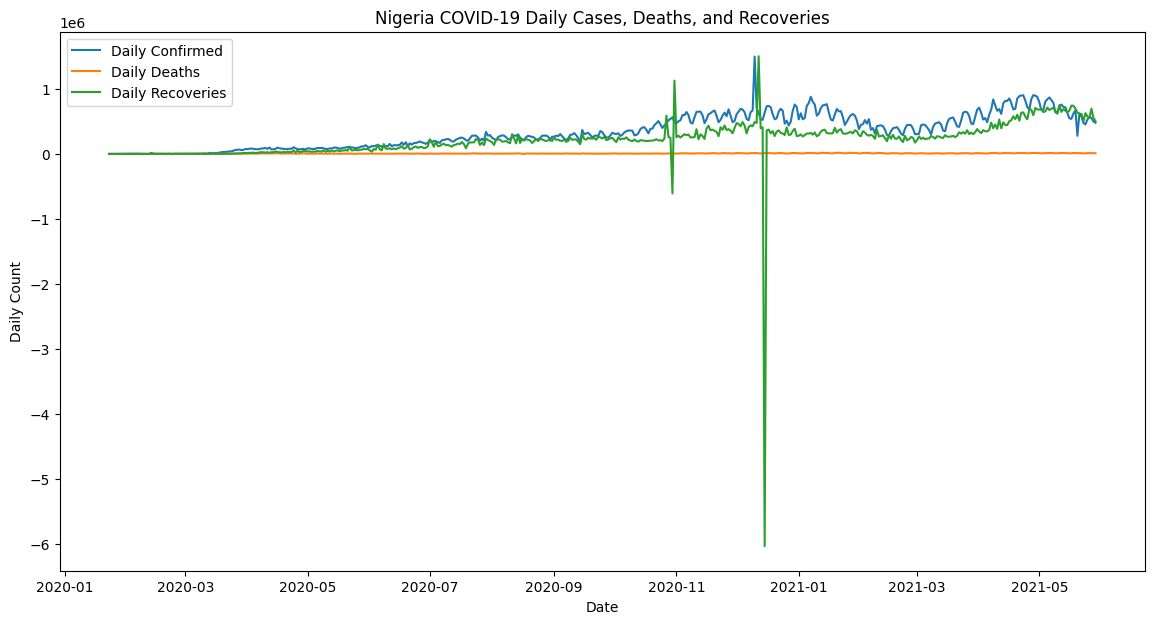

In [14]:
naija_trends = covid.groupby('Date').sum()

# Calculate daily changes
naija_trends['Daily Confirmed'] = naija_trends['Confirmed'].diff()
global_trends['Daily Deaths'] = global_trends['Deaths'].diff()
global_trends['Daily Recoveries'] = global_trends['Recovered'].diff()

# Plot cumulative trends
plt.figure(figsize=(14, 7))
plt.plot(naija_trends.index, naija_trends['Confirmed'], label='Confirmed')
plt.plot(naija_trends.index, naija_trends['Deaths'], label='Deaths')
plt.plot(naija_trends.index, naija_trends['Recovered'], label='Recovered')
plt.legend()
plt.title("Nigeria COVID-19 Cumulative Cases, Deaths, and Recoveries")
plt.xlabel("Date")
plt.ylabel("Count")
plt.show()

# Plot daily changes
plt.figure(figsize=(14, 7))
plt.plot(global_trends.index, global_trends['Daily Confirmed'], label='Daily Confirmed')
plt.plot(global_trends.index, global_trends['Daily Deaths'], label='Daily Deaths')
plt.plot(global_trends.index, global_trends['Daily Recoveries'], label='Daily Recoveries')
plt.legend()
plt.title("Nigeria COVID-19 Daily Cases, Deaths, and Recoveries")
plt.xlabel("Date")
plt.ylabel("Daily Count")
plt.show()


# Global Mortality Rates

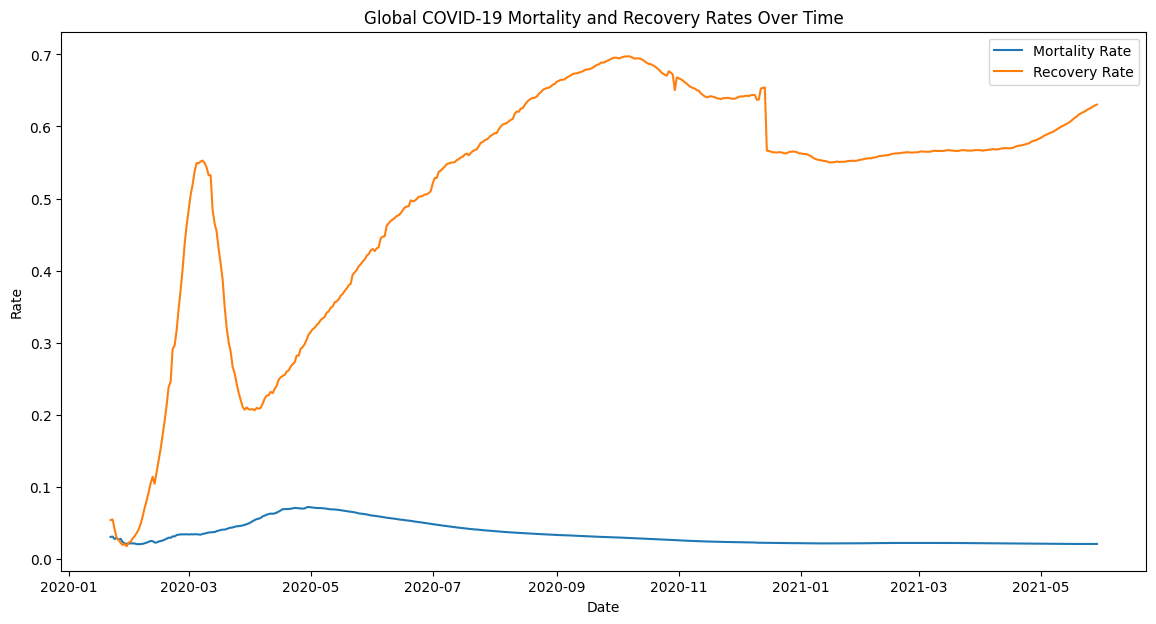

In [15]:
# Mortality and recovery rates
global_trends['Mortality Rate'] = global_trends['Deaths'] / global_trends['Confirmed']
global_trends['Recovery Rate'] = global_trends['Recovered'] / global_trends['Confirmed']

# Plot Mortality and Recovery Rates
plt.figure(figsize=(14, 7))
plt.plot(global_trends.index, global_trends['Mortality Rate'], label='Mortality Rate')
plt.plot(global_trends.index, global_trends['Recovery Rate'], label='Recovery Rate')
plt.legend()
plt.title("Global COVID-19 Mortality and Recovery Rates Over Time")
plt.xlabel("Date")
plt.ylabel("Rate")
plt.show()

In [21]:
covid['Confirmed'] = pd.to_numeric(covid['Confirmed'], errors='coerce')

C:\Users\abula\AppData\Local\Temp\ipykernel_18764\1195904126.py:3: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_countries = covid.groupby('Country/Region').apply(lambda x: x['Confirmed'].max()).sort_values(ascending=False).head(5).index


Index(['France', 'India', 'Turkey', 'UK', 'US'], dtype='object', name='Country/Region')


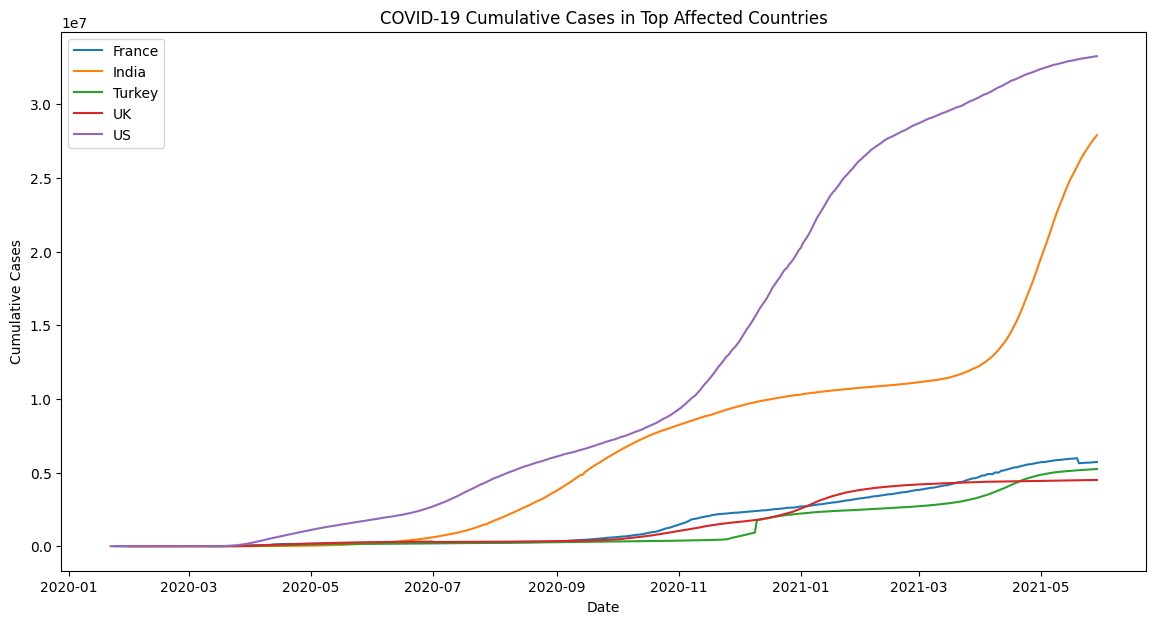

In [26]:

# top_countries = covid.groupby('Country/Region').max()['Confirmed'].sort_values(ascending=False).head(5).index
# Group by 'Country/Region' and apply max with a lambda function
top_countries = covid.groupby('Country/Region').apply(lambda x: x['Confirmed'].max()).sort_values(ascending=False).head(5).index
print(top_countries)

plt.figure(figsize=(14, 7))
for country in top_countries:
    country_data = covid[covid['Country/Region'] == country].groupby('Date').sum()
    plt.plot(country_data.index, country_data['Confirmed'], label=country)

plt.legend()
plt.title("COVID-19 Cumulative Cases in Top Affected Countries")
plt.xlabel("Date")
plt.ylabel("Cumulative Cases")
plt.show()

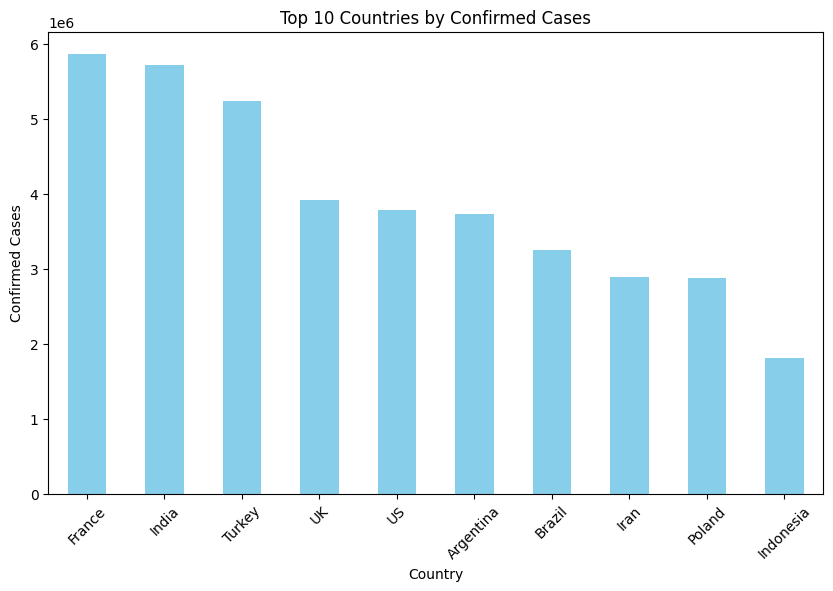

In [27]:
# Top 10 countries with the highest confirmed cases
top_countries = covid.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(10)
top_countries.plot(kind='bar', color='skyblue', figsize=(10,6), title='Top 10 Countries by Confirmed Cases')
plt.xlabel('Country')
plt.ylabel('Confirmed Cases')
plt.xticks(rotation=45)
plt.show()


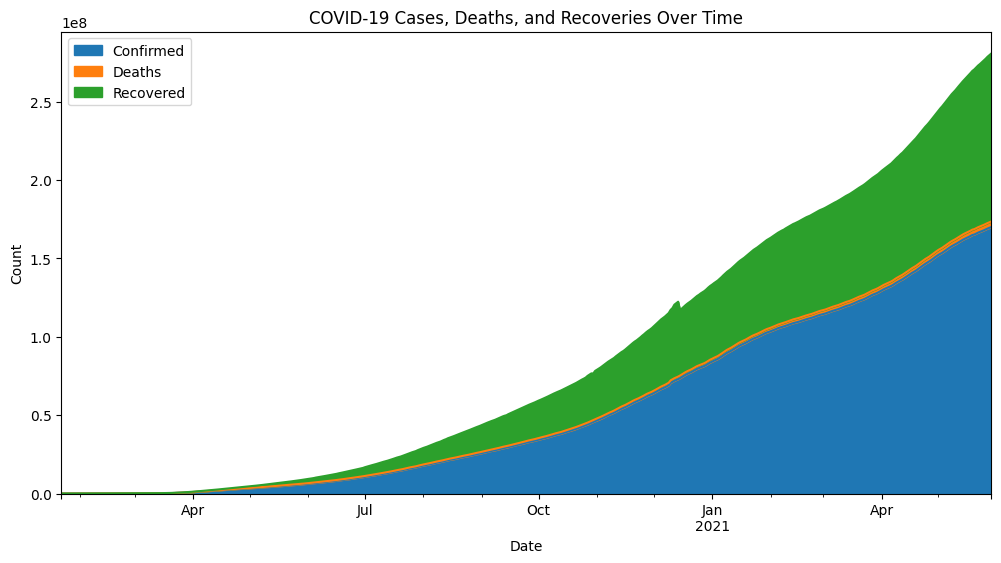

In [28]:
# Assuming you have daily data for confirmed cases, deaths, and recoveries
covid_by_date = covid.groupby('Date')[['Confirmed', 'Deaths', 'Recovered']].sum()
covid_by_date.plot(kind='area', stacked=True, figsize=(12, 6), title='COVID-19 Cases, Deaths, and Recoveries Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.show()

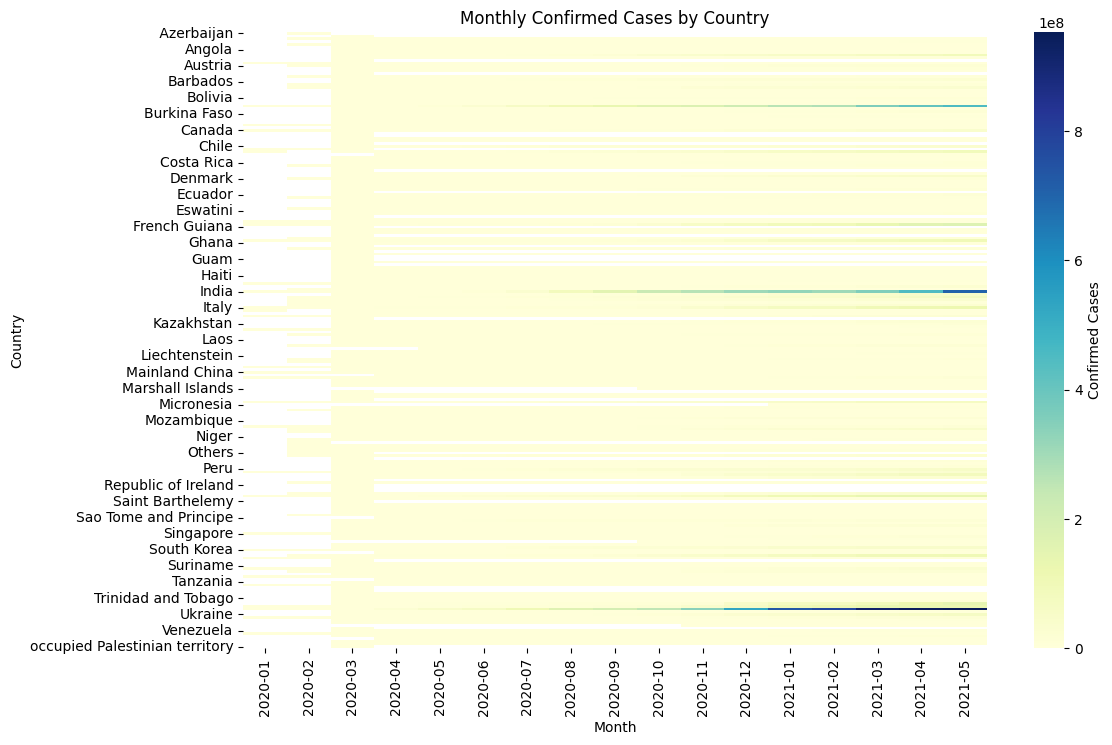

In [29]:
import seaborn as sns

# Aggregate monthly confirmed cases per country
covid['Month'] = covid['Date'].dt.to_period('M')
heatmap_data = covid.groupby(['Country/Region', 'Month'])['Confirmed'].sum().unstack()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap="YlGnBu", cbar_kws={'label': 'Confirmed Cases'})
plt.title('Monthly Confirmed Cases by Country')
plt.xlabel('Month')
plt.ylabel('Country')
plt.show()


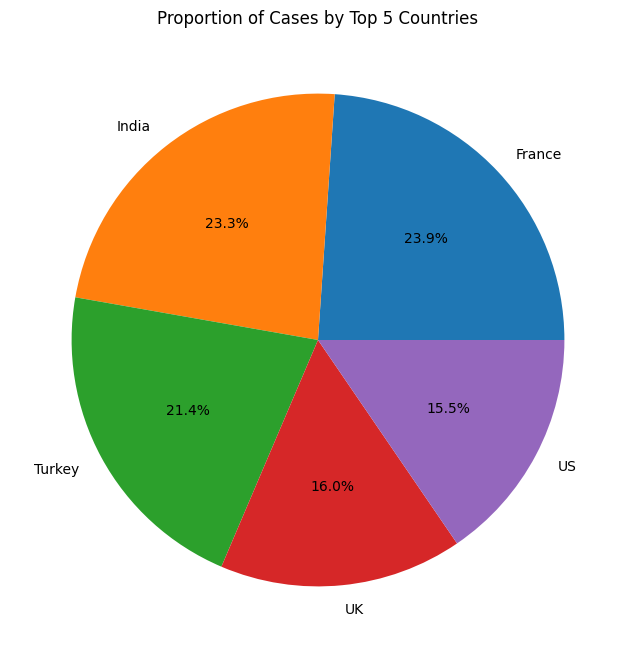

In [30]:
# Proportion of cases by top 5 countries
top_countries = covid.groupby('Country/Region')['Confirmed'].max().sort_values(ascending=False).head(5)
top_countries.plot(kind='pie', autopct='%1.1f%%', figsize=(8,8), title='Proportion of Cases by Top 5 Countries')
plt.ylabel('') # Hide y-label for aesthetics
plt.show()

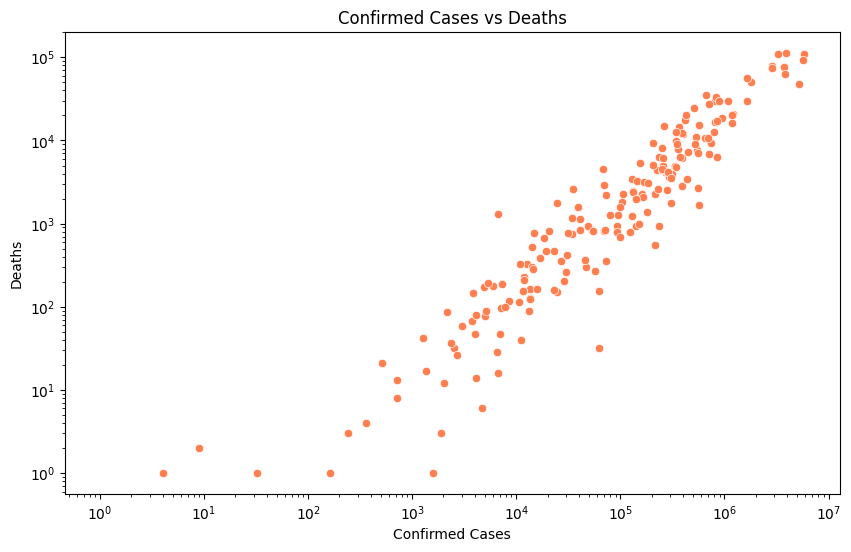

In [35]:
# Scatter plot of confirmed cases vs deaths
covid_latest = covid.groupby('Country/Region')[['Confirmed', 'Deaths']].max()
plt.figure(figsize=(10, 6))
sns.scatterplot(data=covid_latest, x='Confirmed', y='Deaths', color='coral')
plt.title('Confirmed Cases vs Deaths')
plt.xlabel('Confirmed Cases')
# plt.label('Deaths')
plt.xscale('log')
plt.yscale('log')
plt.show()

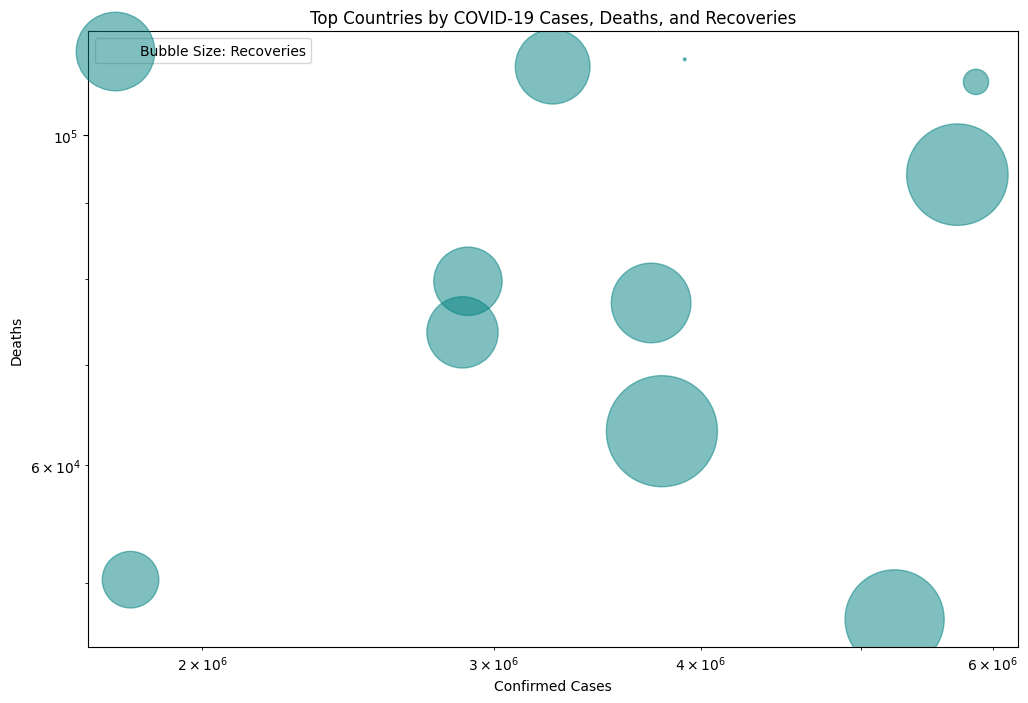

In [39]:
# Bubble chart for top countries by confirmed cases, deaths, and recoveries
top_countries = covid.groupby('Country/Region')[['Confirmed', 'Deaths', 'Recovered']].max().nlargest(10, 'Confirmed')
plt.figure(figsize=(12, 8))
plt.scatter(top_countries['Confirmed'], top_countries['Deaths'], 
            s=top_countries['Recovered']/1000, alpha=0.5, color='teal')
plt.title('Top Countries by COVID-19 Cases, Deaths, and Recoveries')
plt.xlabel('Confirmed Cases')
plt.ylabel('Deaths')
plt.xscale('log')
plt.yscale('log')
plt.legend(['Bubble Size: Recoveries'], loc='upper left')
plt.show()

In [23]:
print(covid['Confirmed'].dtype)

# Check for non-numeric values in 'Confirmed'
non_numeric = covid[pd.to_numeric(covid['Confirmed'], errors='coerce').isna()]
print(non_numeric)

float64
Empty DataFrame
Columns: [Date, Province/State, Country/Region, Confirmed, Deaths, Recovered]
Index: []


---

### **Overview of ARIMA**

**ARIMA** stands for **Auto-Regressive Integrated Moving Average**, a popular model used for time-series forecasting. The ARIMA model has three main components, each represented by a parameter:

1. **Auto-Regressive (AR)**: This component captures the relationship between an observation and a certain number of lagged observations (previous values).
2. **Integrated (I)**: This part of the model makes the time series stationary by differencing the data. Stationary data has constant statistical properties (mean, variance) over time, which ARIMA requires.
3. **Moving Average (MA)**: This component captures the relationship between an observation and a lagged error term from previous time steps.

The ARIMA model is specified by three parameters **(p, d, q)**:
   - **p**: The number of lag observations (AR term).
   - **d**: The number of times the data is differenced to make it stationary (I term).
   - **q**: The number of lagged forecast errors used in the model (MA term).

---

### **Steps in Building the ARIMA Model for COVID-19 Daily Cases**

#### 1. **Prepare the Data**

First, we extracted the daily confirmed COVID-19 cases and ensured the time series was in the correct format.

```python
# Extract the daily confirmed cases time series
daily_cases = global_trends['Daily Confirmed'].dropna()
```

#### 2. **Split the Data into Training and Testing Sets**

We split the time series data into a **training set** (to train the model) and a **testing set** (to evaluate the forecast).

```python
# Split into train and test sets
train_data = daily_cases[:int(0.8 * len(daily_cases))]
test_data = daily_cases[int(0.8 * len(daily_cases)):]
```

#### 3. **Configure the ARIMA Model**

We set up an ARIMA model with parameters **(5, 1, 0)**:
   - **p = 5**: The model looks at the past 5 days of data to make predictions.
   - **d = 1**: We applied one round of differencing to make the data stationary.
   - **q = 0**: We did not include any moving average terms, as `q=0`.

```python
from statsmodels.tsa.arima.model import ARIMA

# Set up and fit the ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))
model_fit = model.fit()
```

#### 4. **Fit the Model and Generate Forecast**

After fitting the model, we used it to make predictions for the length of the test set.

```python
# Forecast the values for the test period
forecast = model_fit.forecast(steps=len(test_data))
```

---

### **Explanation of the Plot**

To visualize the forecasted values, we plotted both the **actual daily cases** and the **forecasted values** on the same plot.

```python
import matplotlib.pyplot as plt

# Plot the actual vs. forecasted values
plt.plot(test_data.index, test_data, label='Actual Daily Cases')
plt.plot(test_data.index, forecast, label='Forecasted Daily Cases', color='red')
plt.legend()
plt.title("ARIMA Forecast of Daily COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Daily Cases")

# Rotate x-axis labels for readability
plt.xticks(rotation=45)
plt.show()
```

#### **Plot Interpretation**
- **Actual Daily Cases**: The blue line shows the actual observed daily COVID-19 cases from the test data. This line represents the true progression of cases.
- **Forecasted Daily Cases**: The red line represents the ARIMA model’s predictions for the test period based on the training data. If the model fits well, the forecasted line should closely follow the actual daily cases.

### **How the ARIMA Model Forecasts Values**

1. **Training on Historical Data**: The ARIMA model learns patterns from past data by analyzing both the lagged values and the differenced data.
2. **Forecasting by Recurrence**: For each time step, the model generates a forecast based on the relationship it learned from previous time steps. The ARIMA model forecasts future values by iteratively using its previous predictions to inform the next step, particularly if we forecast beyond one time step.
3. **Evaluating the Fit**: If the forecasted line closely matches the actual data, it indicates that the model captures underlying trends and patterns in the data.

---

### **Summary of the ARIMA Model (5, 1, 0) for COVID-19 Forecasting**

The ARIMA model with parameters (5, 1, 0) forecasts daily COVID-19 cases based on the past 5 days of data, using one level of differencing to make the series stationary. By comparing forecasted values with actual data, we can evaluate how accurately the model captures the daily case trends, making it useful for short-term predictions in a time series like COVID-19 cases.

c:\Users\abula\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\abula\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\abula\miniconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


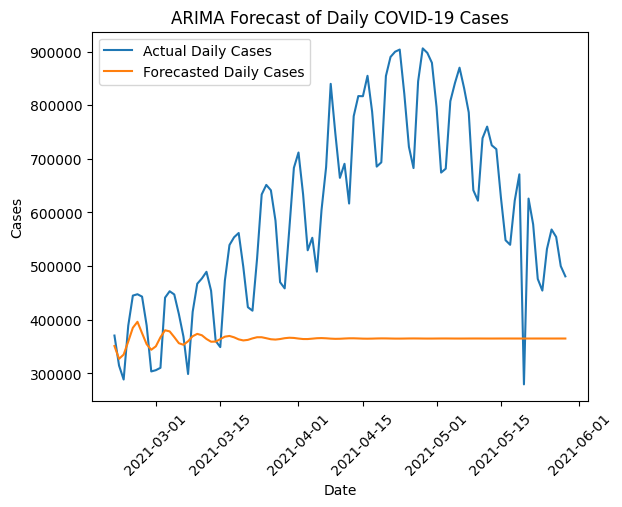

In [16]:
from statsmodels.tsa.arima.model import ARIMA

# Prepare data for modeling (e.g., daily confirmed cases)
daily_cases = global_trends['Daily Confirmed'].dropna()

# Split into train and test sets
train_data = daily_cases[:int(0.8 * len(daily_cases))]
test_data = daily_cases[int(0.8 * len(daily_cases)):]

# Fit an ARIMA model
model = ARIMA(train_data, order=(5, 1, 0))  # Adjust parameters as needed
model_fit = model.fit()

# Forecast
forecast = model_fit.forecast(steps=len(test_data))
plt.plot(test_data.index, test_data, label='Actual Daily Cases')
plt.plot(test_data.index, forecast, label='Forecasted Daily Cases')
plt.legend()
plt.title("ARIMA Forecast of Daily COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Cases")

# Rotate x-axis labels
plt.xticks(rotation=45)
plt.show()



20:16:42 - cmdstanpy - INFO - Chain [1] start processing
20:16:43 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1000x600 with 0 Axes>

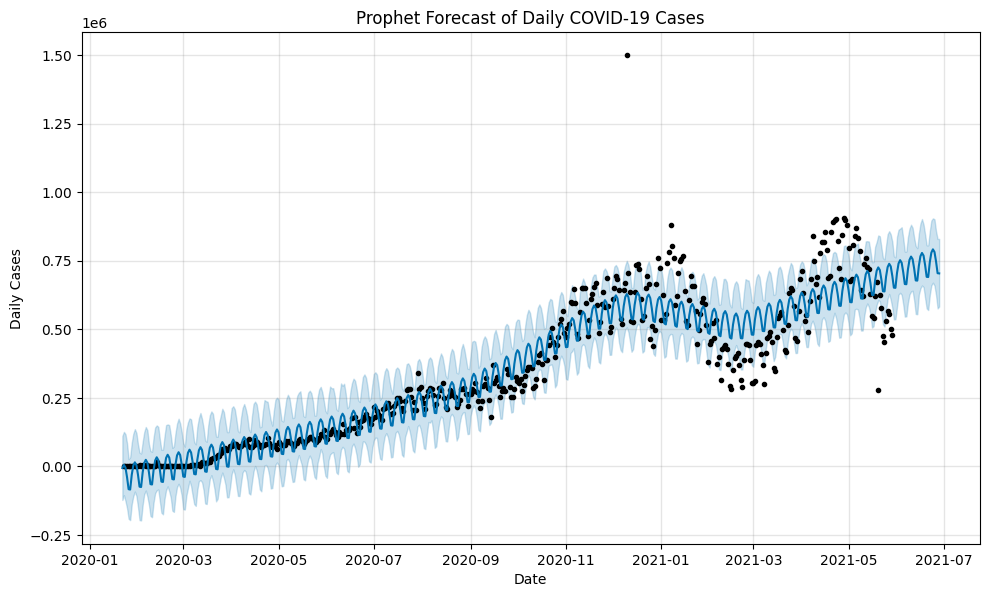

<Figure size 1000x600 with 0 Axes>

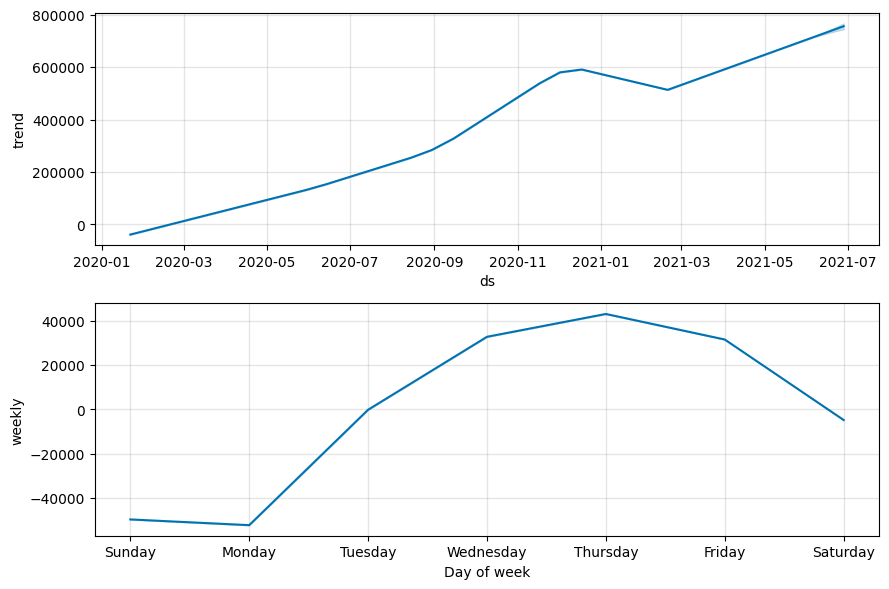

            ds           yhat     yhat_lower     yhat_upper
514 2021-06-19  734101.868339  613315.025272  845991.996041
515 2021-06-20  691138.080070  575936.120305  806147.328118
516 2021-06-21  690433.026488  570043.797377  806196.961907
517 2021-06-22  744364.602238  624744.428733  858065.316745
518 2021-06-23  779142.804024  660133.012055  896164.466612
519 2021-06-24  791320.485518  669733.283980  904192.964827
520 2021-06-25  781679.073093  659352.443905  901121.085077
521 2021-06-26  747262.247591  624773.561686  857625.611665
522 2021-06-27  704298.459322  575977.932344  829191.775037
523 2021-06-28  703593.405740  582584.146293  829545.971587


In [17]:
# Import required libraries
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Assume `global_trends` DataFrame already exists and contains a 'Date' index and 'Daily Confirmed' column
# Step 1: Prepare the data for Prophet
# Reset the index to make 'Date' a column, rename columns for Prophet
prophet_data = global_trends.reset_index()[['Date', 'Daily Confirmed']]
prophet_data.columns = ['ds', 'y']  # Rename columns to 'ds' and 'y' for Prophet

# Step 2: Initialize and train the Prophet model
model = Prophet()
model.fit(prophet_data)

# Step 3: Create future dates for 30 days and make predictions
future = model.make_future_dataframe(periods=30)  # Forecast for the next 30 days
forecast = model.predict(future)

# Step 4: Plot the forecasted data
plt.figure(figsize=(10, 6))
model.plot(forecast)
plt.title("Prophet Forecast of Daily COVID-19 Cases")
plt.xlabel("Date")
plt.ylabel("Daily Cases")
plt.show()

# Step 5: Plot the forecast components (Trend and Seasonality)
plt.figure(figsize=(10, 6))
model.plot_components(forecast)
plt.savefig('topcountries.png')
plt.show()

# Step 6: Display the forecasted values with confidence intervals
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10))


## Explanation

1. **Observed Data (Black Dots)**:
   - The black dots represent actual daily cases. We can see fluctuations with some outliers where case counts suddenly rise or fall, which may correspond to real-world events or reporting irregularities.
   - There is an upward trend overall, indicating an increase in daily cases over time, with two noticeable surges (around mid-2020 and early 2021).

2. **Trend Line (Blue Line)**:
   - The blue line represents Prophet's forecasted trend, showing a steady increase in daily cases. The trend captures the general rise in cases, but it smooths out sudden peaks and troughs.
   - The trend is relatively stable, which is in line with the gradual increase in cases over time, potentially due to cumulative spread.

3. **Seasonality Pattern**:
   - The wavy pattern within the blue line suggests a weekly seasonality effect, indicating that there might be weekly fluctuations in COVID-19 case reporting or incidence.
   - These repeating oscillations might reflect variations in case reporting (e.g., reduced reporting on weekends) or other cyclical behaviors.

4. **Confidence Intervals (Shaded Blue Area)**:
   - The shaded blue area represents the model’s 95% confidence interval, showing where the model expects the true values to fall most of the time.
   - During periods with a strong upward trend, the confidence intervals widen, suggesting increased uncertainty in predicting future cases. This could be due to higher variability in the data as case counts increase.

5. **Seasonal Peaks and Troughs**:
   - The model seems to capture periods where cases peak and drop (for example, around early 2021), but it doesn’t always match perfectly with the observed data.
   - Some of the larger peaks (spikes) in the observed data fall outside the confidence intervals, indicating that the model was not able to fully capture these fluctuations.

6. **Overall Trend**:
   - The trend line continues to rise over time, showing a strong upward momentum. This likely reflects the ongoing spread of COVID-19 in the dataset’s timeline, which might be influenced by factors like new variants, changes in public behavior, or mitigation efforts.

### **Interpretation and Insights**

- **Trend and Growth**: The forecasted trend shows a general increase in daily cases, indicating that cases are growing over time. This trend is useful for planning responses to rising case counts.
- **Weekly Seasonality**: The oscillations within each week suggest that cases might have a cyclical pattern, which could be due to real-world weekly patterns in testing or reporting.
- **Uncertainty**: As the case counts increase, the uncertainty widens, indicating that it’s more challenging for the model to predict future cases as variability increases.

### **Next Steps**

1. **Further Analysis of Seasonality Components**: You can plot the components (trend, weekly, yearly) using Prophet's `plot_components()` function to get a better view of the seasonality patterns.
2. **Incorporate Additional Features**: If available, try adding external features (like mobility data, policy measures, or testing rates) to improve model accuracy.
3. **Monitor High Peaks**: Since some peaks fall outside the confidence interval, consider using additional models or data (e.g., interventions or variant data) to account for sudden spikes.